In [411]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [412]:
df = pd.read_csv('Datasets\\CrabAgePrediction.csv')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [524]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [414]:
df['Sex']

0       F
1       M
2       I
3       F
4       I
       ..
3888    F
3889    F
3890    I
3891    I
3892    I
Name: Sex, Length: 3893, dtype: object

In [415]:
df['Sex'].value_counts()

Sex
M    1435
I    1233
F    1225
Name: count, dtype: int64

In [416]:
df[['Sex','Age']].tail

<bound method NDFrame.tail of      Sex  Age
0      F    9
1      M    6
2      I    6
3      F   10
4      I    6
...   ..  ...
3888   F    8
3889   F   10
3890   I    5
3891   I    6
3892   I    8

[3893 rows x 2 columns]>

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [418]:
from sklearn.preprocessing import OneHotEncoder

In [419]:
encoder = OneHotEncoder()

In [420]:
encoded = encoder.fit_transform(df[['Sex']]).toarray()

In [421]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out(['Sex']))

In [422]:
encoded_df.head()

,Sex_F,Sex_I,Sex_M
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [423]:
df_final = pd.concat([df,encoded_df],axis=1)
# df_final = df

In [424]:
df_final.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0


In [425]:
df_final.drop('Sex',axis=1,inplace=True)

In [426]:
df_final.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0


In [427]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3893 non-null   float64
 1   Diameter        3893 non-null   float64
 2   Height          3893 non-null   float64
 3   Weight          3893 non-null   float64
 4   Shucked Weight  3893 non-null   float64
 5   Viscera Weight  3893 non-null   float64
 6   Shell Weight    3893 non-null   float64
 7   Age             3893 non-null   int64  
 8   Sex_F           3893 non-null   float64
 9   Sex_I           3893 non-null   float64
 10  Sex_M           3893 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 334.7 KB


In [428]:
df_final.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.00000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791,0.314667,0.316722,0.36861
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967,0.464443,0.465258,0.48249
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.000000,0.00000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000,0.000000,0.000000,0.00000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000,0.000000,0.000000,0.00000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000,1.000000,1.000000,1.00000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000,1.000000,1.000000,1.00000


In [429]:
df_final.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973,0.306918,-0.550747,0.235639
Diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844,0.316588,-0.563991,0.239101
Height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956,0.294480,-0.514116,0.212289
Weight,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819,0.297425,-0.555202,0.249073
Shucked Weight,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760,0.261734,-0.518380,0.247921
Viscera Weight,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328,0.305960,-0.553913,0.239614
Shell Weight,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195,0.305459,-0.545632,0.232112
Age,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000,0.249282,-0.437937,0.182339
Sex_F,0.306918,0.316588,0.294480,0.297425,0.261734,0.305960,0.305459,0.249282,1.000000,-0.461334,-0.517738
Sex_I,-0.550747,-0.563991,-0.514116,-0.555202,-0.518380,-0.553913,-0.545632,-0.437937,-0.461334,1.000000,-0.520206


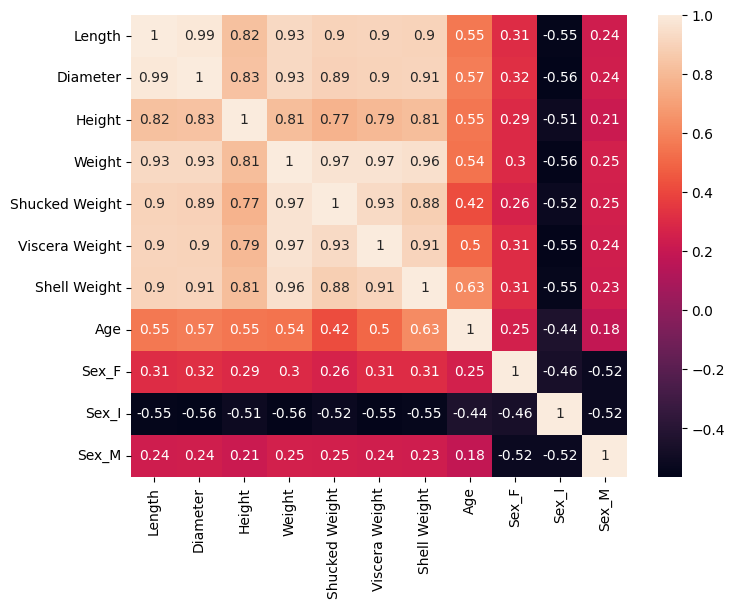

In [431]:

# features = df_final.select_dtypes(include=['int64', 'float64'])

# plt.figure(figsize=(15, 10))

# for i, col in enumerate(features, 1):
#     plt.subplot(3 , 3, i)  # adjust grid as per features count
#     plt.scatter(df_final[col], df_final['Age'], alpha=0.5)
#     plt.xlabel(col)
#     plt.ylabel('Age')
#     plt.title(f'{col} vs {'Age'}')

# plt.tight_layout()
# plt.show()


In [432]:
df_final['Weight'].unique()

array([24.6357155 ,  5.40057975,  7.95203475, ..., 37.5630875 ,
       47.740558  ,  4.06815325])

In [511]:
df_final['Density'] = df_final['Weight'] / (df_final['Length'] * df_final['Diameter'] * df_final['Height'])
# sns.pairplot(df_final)

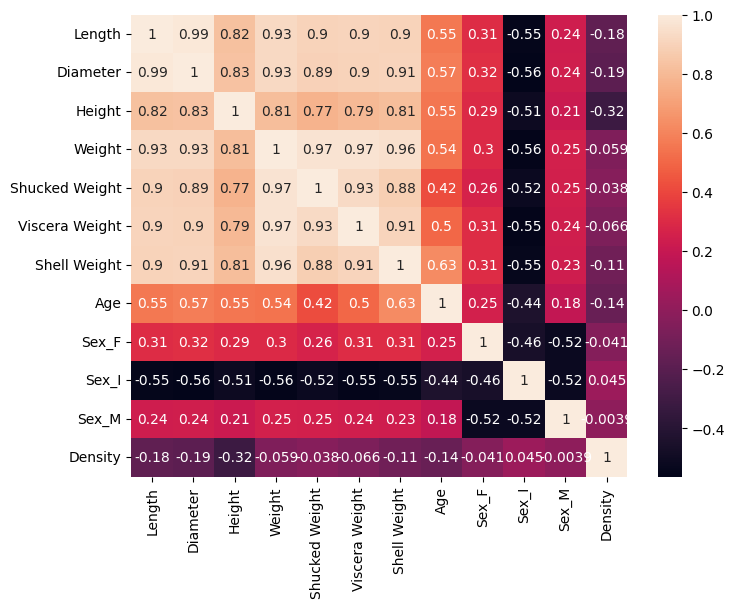

In [523]:
plt.figure(figsize=(8,6))
sns.heatmap(df_final.corr(),annot=True)
plt.show()

In [512]:
from sklearn.model_selection import train_test_split

In [513]:
# X = df_final.drop(['Age','Shucked Weight','Viscera Weight','Shell Weight'],axis=1)
X = df_final.drop(['Age','Shucked Weight'],axis=1)

In [522]:
X.describe()

c:\Users\yashs\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Length,Diameter,Height,Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Density
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.00000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,5.136546,6.795844,0.314667,0.316722,0.36861,inf
std,0.300431,0.248233,0.104976,13.891201,3.104133,3.943392,0.464443,0.465258,0.48249,NaN
min,0.187500,0.137500,0.000000,0.056699,0.014175,0.042524,0.000000,0.000000,0.00000,5.904643
25%,1.125000,0.875000,0.287500,12.672227,2.664853,3.713785,0.000000,0.000000,0.00000,40.319289
50%,1.362500,1.062500,0.362500,22.792998,4.861939,6.662133,0.000000,0.000000,0.00000,43.692560
75%,1.537500,1.200000,0.412500,32.786197,7.200773,9.355335,1.000000,1.000000,1.00000,47.589215
max,2.037500,1.625000,2.825000,80.101512,21.545620,28.491248,1.000000,1.000000,1.00000,inf


In [515]:
y = df['Age']

In [516]:
y

0        9
1        6
2        6
3       10
4        6
        ..
3888     8
3889    10
3890     5
3891     6
3892     8
Name: Age, Length: 3893, dtype: int64

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [520]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [519]:
y_test

3546     6
2398     8
3865    11
1187     9
315      6
        ..
3454     7
2765     3
978      7
650      8
2661     9
Name: Age, Length: 779, dtype: int64

In [503]:
from sklearn.linear_model import LinearRegression

In [504]:
model = LinearRegression()

In [505]:
model.fit(X_train,y_train)

LinearRegression()

In [506]:
y_pred = model.predict(X_test)

In [507]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [508]:


mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)



5.523436768823594
1.630443571106442
2.350199304064146


In [509]:
from sklearn.metrics import r2_score

In [510]:
score = r2_score(y_test,y_pred)
print(score)

0.4252083813240358


In [491]:
from sklearn.ensemble import RandomForestRegressor 

In [492]:
rf_model = RandomForestRegressor()

In [493]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [494]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [495]:
y_pred_rf = rf_model.predict(X_test)
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_pred_rf)
print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format(model_test_r2))

Model performance for Test set
- Root Mean Squared Error: 2.1204
- Mean Absolute Error: 1.5147
- R2 Score: 0.5321


<Axes: xlabel='Age', ylabel='Weight'>

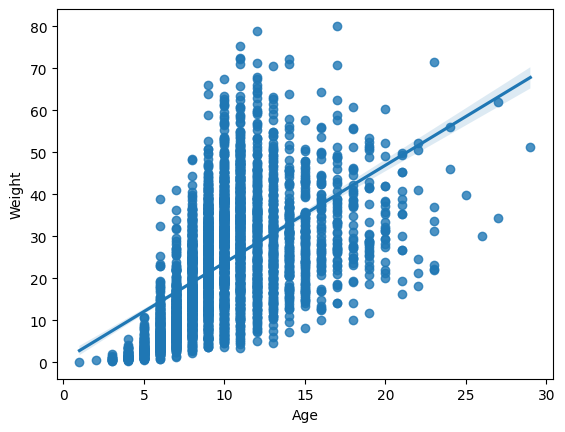

In [455]:
import seaborn as sns
sns.regplot(x="Age", y="Weight", data=df_final)
